In [1]:
import tensorflow as tf
import numpy as np


### 1. 建立GRAPH
### 2. 啟動SESSION運行GRAPH

### 常數
建立一個[1,0]的常數  
a = tf.constant([1.,0.],dtype=tf.float32,  name='const_a')

In [2]:
a = tf.constant([1.,0.],dtype=tf.float32,  name='const_a')
print(a)

Tensor("const_a:0", shape=(2,), dtype=float32)


#### 建立session  
sess = tf.Session()  
sess.run(a)  
sess.close()  

sess.run(變數)可以取出變數值  


In [3]:
sess = tf.Session()
sess.run(a)
sess.close()

#### 運算
tf.add, tf.subtract, tf.multiply, tf.divide -> +, -, *, /

In [4]:
x = tf.constant([3.,0.],dtype=tf.float32, name='x')
y = tf.constant([1.,1.],dtype=tf.float32, name='y')
z1 = tf.add(x,y, name='x_add_y')
z2 = tf.multiply(x,y, name='x_mult_y')
print(z1)
print("----")
print(z2)

with tf.Session() as sess:
  out1, out2 = sess.run([z1,z2])
  print(out1)
  print("----")
  print(out2)

Tensor("x_add_y:0", shape=(2,), dtype=float32)
----
Tensor("x_mult_y:0", shape=(2,), dtype=float32)
[4. 1.]
----
[3. 0.]


### tf.placeholder  
設置當做之後的輸入

In [5]:
#不填值, 直到run的時候再填值, 記得要給與shape
X = tf.placeholder(dtype=tf.float32, shape=[2,2], name='input')
one = tf.constant([[1,1],[1,1]], dtype=tf.float32,name='one')
ret = X + one
with tf.Session() as sess:
  result = sess.run(ret, feed_dict= {X: [[1,2],[3,4]]})
  print(result)

[[2. 3.]
 [4. 5.]]


### tf.Variable  
記得使用前要init = tf.global_variables_initializer()  
再session.run()初始化  


In [9]:
a = tf.Variable(3., name='var_a')
b = tf.Variable(2., name='var_b')
Sum = tf.add(a, b, name='addab')
init = tf.global_variables_initializer()
with tf.Session() as sess:
  sess.run(init)
  result =sess.run(Sum)
  print(result)

5.0


### tf.assign
改變variable的值  
tf.assign(變數名稱,要賦予的值)  
下例中Sum會在assign的時候自動更新

In [7]:
a = tf.Variable(0., name='var_a')
b = tf.constant(2.,name='var_b')
Sum = tf.add(a,b,name='addab')
# 將Sum的值賦予給a, 所以a=a+b
c = tf.assign(a,Sum)
init = tf.global_variables_initializer()

sess = tf.Session()
sess.run(init)
for _ in range(3):
    print('a=',sess.run(a))
    #print('sum=',sess.run(Sum))
    #print('---')
    # run a = a + b
    sess.run(c)
sess.close()

a= 0.0
a= 2.0
a= 4.0


In [8]:
#上例等同於
a = np.array(0.)
b = np.array(2.)
Sum = a + b 
for _ in range(3):
    print('a=',a)
    a = Sum
    Sum = a + b

a= 0.0
a= 2.0
a= 4.0


## reset graph. 


In [2]:
import numpy as np
import tensorflow as tf
from pprint import pprint

tf.reset_default_graph()  # clean the graph
pprint(tf.global_variables())

[]


In [3]:
a = tf.Variable(1.)
a = tf.Variable([2., 0.])
a = tf.Variable([1., 2., 3.], name='var')
a = tf.Variable([[5.], [5.]], name='var')
pprint(tf.global_variables())

Instructions for updating:
Colocations handled automatically by placer.
[<tf.Variable 'Variable:0' shape=() dtype=float32_ref>,
 <tf.Variable 'Variable_1:0' shape=(2,) dtype=float32_ref>,
 <tf.Variable 'var:0' shape=(3,) dtype=float32_ref>,
 <tf.Variable 'var_1:0' shape=(2, 1) dtype=float32_ref>]


### Work on the default graph

In [43]:
tf.reset_default_graph()  # clean the graph
#pprint(tf.global_variables())

my_graph = tf.Graph()
with my_graph.as_default():
    X = tf.placeholder(dtype=tf.float32, shape=[3,2], name='input')
    w = tf.Variable([[1],[1]],dtype=tf.float32, name='weight')
    b = tf.Variable(0.,dtype=tf.float32)
    bc = tf.constant(1.,dtype=tf.float32)
    #Mult = tf.multiply(X,w, name='w_mult_X')
    Matmul = tf.matmul(X,w, name='X_matmul_w')
    Sum = tf.add(Matmul,b,name='wx_sum_b')
    z = tf.Variable([[1],[1],[1]],dtype=tf.float32, name='z')
    assign_c = tf.assign(z, Sum)
    ret = assign_c + bc
    init = tf.global_variables_initializer()
    pprint(tf.global_variables())

with tf.Session(graph=my_graph) as sess:
    sess.run(init)
    for _ in range(3):
        print(sess.run(ret, feed_dict= {X: [[1,2],[3,4],[5,6]]}))
        pass

[<tf.Variable 'weight:0' shape=(2, 1) dtype=float32_ref>,
 <tf.Variable 'Variable:0' shape=() dtype=float32_ref>,
 <tf.Variable 'z:0' shape=(3, 1) dtype=float32_ref>]
[[ 4.]
 [ 8.]
 [12.]]
[[ 4.]
 [ 8.]
 [12.]]
[[ 4.]
 [ 8.]
 [12.]]


In [68]:
tf.reset_default_graph() 
a = tf.constant([[1.,1.],[2.,2.],[3.,3.]],dtype=tf.float32)
with tf.Session() as sess:
    for _ in range(3):
        pprint(a)
        print(sess.run(a))
        #print(tf.reduce_mean(a))
        pass

<tf.Tensor 'Const:0' shape=(3, 2) dtype=float32>
[[1. 1.]
 [2. 2.]
 [3. 3.]]
<tf.Tensor 'Const:0' shape=(3, 2) dtype=float32>
[[1. 1.]
 [2. 2.]
 [3. 3.]]
<tf.Tensor 'Const:0' shape=(3, 2) dtype=float32>
[[1. 1.]
 [2. 2.]
 [3. 3.]]


## 訓練 A linear regression example  
### $ (1)\; \hat y_i = wx_i + b $
### $ (2)\; MSE = \frac{1}{n} \sum_{i=1}^n (\hat y_i - y_i)^2 $

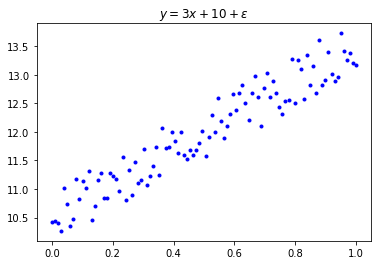

In [47]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from pprint import pprint

# --------------------------------generate data-------------------------------------
x_in = np.linspace(0, 1, 100)
y_true = 3*x_in + 10 + np.random.rand(len(x_in))

plt.plot(x_in, y_true, 'b.')
plt.title('$ y = 3x + 10 + \epsilon$')
plt.show()

In [95]:
# build network
tf.reset_default_graph() 

inputs = tf.placeholder(shape=[100], dtype=tf.float32, name='X')
y_label = tf.placeholder(shape=[100], dtype=tf.float32, name='label')

w1 = tf.Variable([0.5],dtype=tf.float32, name='weight')
b1 = tf.Variable([0.0],dtype=tf.float32, name='bias')
y_pred = tf.add(tf.multiply(w1,inputs),b1,name='y_pred')

loss = tf.reduce_mean(tf.square(y_pred - y_label), name='mse')
optim = tf.train.GradientDescentOptimizer(learning_rate=0.1) 
train_ops = optim.minimize(loss)

init = tf.global_variables_initializer()
pprint(tf.global_variables())

[<tf.Variable 'weight:0' shape=(1,) dtype=float32_ref>,
 <tf.Variable 'bias:0' shape=(1,) dtype=float32_ref>]


-----start training-----
step:   0, weight: 1.714, bias: 2.346, loss:77.250
step:  25, weight: 4.677, bias: 9.573, loss:0.344
step:  50, weight: 4.175, bias: 9.848, loss:0.213
step:  75, weight: 3.815, bias: 10.041, loss:0.146
step: 100, weight: 3.559, bias: 10.179, loss:0.112
step: 125, weight: 3.375, bias: 10.277, loss:0.094
step: 150, weight: 3.244, bias: 10.347, loss:0.086
step: 175, weight: 3.151, bias: 10.397, loss:0.081
step: 200, weight: 3.085, bias: 10.433, loss:0.079
step: 225, weight: 3.037, bias: 10.458, loss:0.078
step: 250, weight: 3.003, bias: 10.477, loss:0.077
step: 275, weight: 2.979, bias: 10.490, loss:0.077


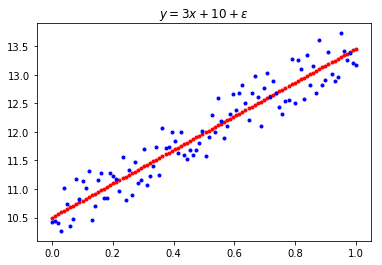

In [96]:
## train the model
sess = tf.Session()
print("-----start training-----")
sess.run(init)
iters=300
for step in np.arange(iters):
    sess.run(train_ops, feed_dict={inputs: x_in, y_label: y_true})  # update variables
    if step%25 == 0:
        print('step: {:3d}, weight: {:.3f}, bias: {:.3f}, loss:{:.3f}'.format(step, sess.run(w1)[0], sess.run(b1)[0],sess.run(loss,feed_dict={inputs: x_in, y_label: y_true})))
    
y_out = sess.run(y_pred, feed_dict={inputs: x_in})
sess.close()
plt.plot(x_in, y_out, 'r.')
plt.plot(x_in, y_true, 'b.')
plt.title('$ y = 3x + 10 + \epsilon$')
plt.show()

# Practice
$ y = w_1x^2 + w_2x + b$ <br>
$ w_1=6, \, w_2=-4, \, b=1 $

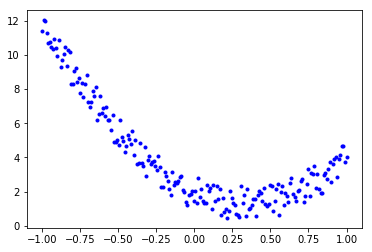

In [121]:
x_in = np.linspace(-1, 1, 200)
y_true = 6*x_in**2 - 4*x_in + 1 + np.random.rand(len(x_in))*2

plt.plot(x_in, y_true, 'b.')
plt.show()

In [122]:
# build network
tf.reset_default_graph() 

inputs = tf.placeholder(shape=[200], dtype=tf.float32, name='X1')
y_label = tf.placeholder(shape=[200], dtype=tf.float32, name='label')

x2 = tf.multiply(inputs,inputs,name='X2')
w1 = tf.Variable([0.5],dtype=tf.float32, name='weight1')
w1x2 = tf.multiply(w1,x2)
w2 = tf.Variable([0.5],dtype=tf.float32, name='weight2')
w2x1 = tf.multiply(w2,inputs)
b1 = tf.Variable([0.0],dtype=tf.float32, name='bias')
y_pred = tf.add(w1x2+w2x1,b1,name='y_pred')

loss = tf.reduce_mean(tf.square(y_pred - y_label), name='mse')
optim = tf.train.GradientDescentOptimizer(learning_rate=0.1) 
train_ops = optim.minimize(loss)

init = tf.global_variables_initializer()
pprint(tf.global_variables())

[<tf.Variable 'weight1:0' shape=(1,) dtype=float32_ref>,
 <tf.Variable 'weight2:0' shape=(1,) dtype=float32_ref>,
 <tf.Variable 'bias:0' shape=(1,) dtype=float32_ref>]


-----start training-----
step:   0, weight: 0.859, bias: 0.766, loss:17.108
step:  25, weight: 3.270, bias: 2.975, loss:1.196
step:  50, weight: 4.211, bias: 2.635, loss:0.625
step:  75, weight: 4.837, bias: 2.406, loss:0.441
step: 100, weight: 5.254, bias: 2.253, loss:0.362
step: 125, weight: 5.531, bias: 2.152, loss:0.326
step: 150, weight: 5.716, bias: 2.084, loss:0.311
step: 175, weight: 5.838, bias: 2.039, loss:0.304
step: 200, weight: 5.920, bias: 2.009, loss:0.301
step: 225, weight: 5.975, bias: 1.989, loss:0.300
step: 250, weight: 6.011, bias: 1.976, loss:0.299
step: 275, weight: 6.035, bias: 1.967, loss:0.299


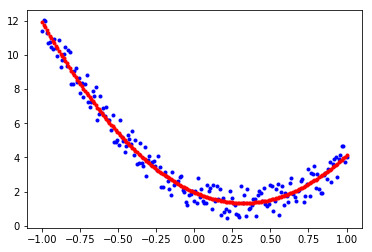

In [124]:
sess = tf.Session()
print("-----start training-----")
sess.run(init)
iters=300
sess.run(x2,feed_dict={inputs: x_in})
for step in np.arange(iters):
    sess.run(train_ops, feed_dict={inputs: x_in, y_label: y_true})  # update variables
    if step%25 == 0:
        print('step: {:3d}, weight: {:.3f}, bias: {:.3f}, loss:{:.3f}'.format(step, sess.run(w1)[0], sess.run(b1)[0],sess.run(loss,feed_dict={inputs: x_in, y_label: y_true})))

y_out = sess.run(y_pred,feed_dict={inputs: x_in})
plt.plot(x_in, y_true, 'b.')
plt.plot(x_in, y_out, 'r.')
plt.show()
